# Teaser

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Dataset

In [2]:
# Download the dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


0


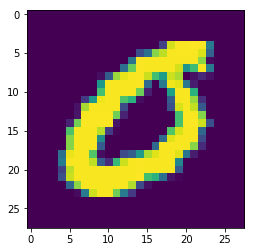

In [3]:
# View example digit
index = np.random.randint(0, 60000)
plt.imshow(x_train[index])
print(y_train[index])

In [4]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
# Flatten
x_train = x_train.reshape(-1,784)
x_test = x_test.reshape(-1,784)

# Convert labels to one-vs-all
from keras.utils import to_categorical
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

In [6]:
# Proper shape for our NN
x_train.shape, y_train.shape

((60000, 784), (60000, 10))

### Building the NN

In [7]:
# Call the DL library
from keras.models import Sequential
from keras.layers import Dense, Activation

<img src=https://i.imgur.com/OFNAslJ.png width="500">

In [8]:
# Build the architecture
model = Sequential()
model.add(Dense(30, input_dim=784))
model.add(Activation('relu'))
model.add(Dense(30))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                23550     
_________________________________________________________________
activation_1 (Activation)    (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
activation_2 (Activation)    (None, 30)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Learning algorithm, Loss
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Train and test
H = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 86us/step - loss: 6.7890 - acc: 0.5678 - val_loss: 5.9809 - val_acc: 0.6222
Epoch 2/5
60000/60000 [==============================] - 5s 77us/step - loss: 5.9243 - acc: 0.6272 - val_loss: 5.7682 - val_acc: 0.6375
Epoch 3/5
60000/60000 [==============================] - 3s 50us/step - loss: 5.7247 - acc: 0.6404 - val_loss: 5.5213 - val_acc: 0.6534
Epoch 4/5
60000/60000 [==============================] - 4s 65us/step - loss: 5.6213 - acc: 0.6476 - val_loss: 5.4448 - val_acc: 0.6585 0.647 - ETA: 1s - loss: 5.6175
Epoch 5/5
60000/60000 [==============================] - 3s 50us/step - loss: 5.5551 - acc: 0.6521 - val_loss: 5.7166 - val_acc: 0.6412


# Challenge

In [11]:
from sklearn.datasets import make_circles

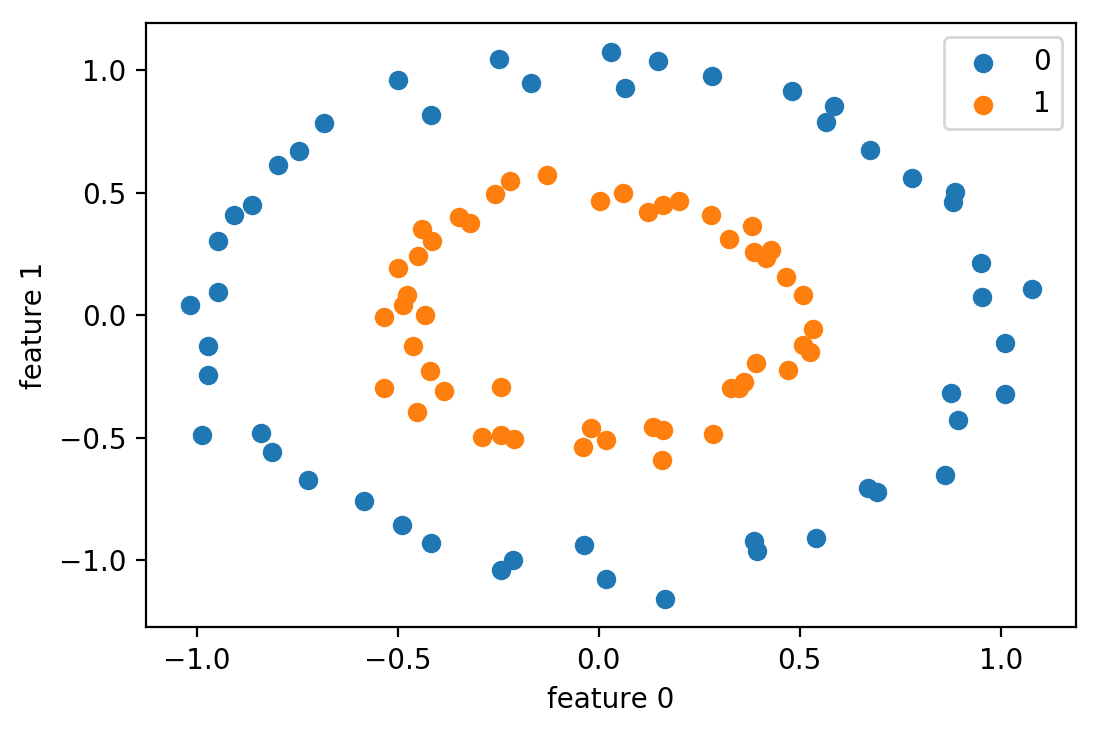

In [12]:
# Generate a dataset
X, y = make_circles(n_samples=100, noise=0.05, factor=0.5, random_state=0)
plt.figure(dpi=200)
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], label=0)
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], label=1)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend()

# 1. Build NN

<img src=https://i.imgur.com/BMcpMsH.png width="800">

In [13]:
# Challenge 1
def nn_parameter_maker(size):
    '''
    Given
    - the number of layers 
    - the number of nodes in each layer
    initializes network parameters (w and b)
    
    Arguments
        size: a list of integers
              length of the list is the number of layers
              each item in the list specifies 
              the number of neurons in that layer
    Returns
        biases: list of numpy arrays
                biases
                for all layers except the input layer
        weights: list of numpy arrays
                weights
                in between all layers
    '''
    weights = [np.random.randn(y, x) for x, y in zip(size[:-1], size[1:])]
    biases = [np.random.randn(y, 1) for y in size[1:]]
    return weights, biases

In [14]:
y = y.reshape(-1, 1)
X.shape, y.shape

((100, 2), (100, 1))

In [15]:
w, b = nn_parameter_maker([2, 3, 1])

In [16]:
b[0], b[0].shape

(array([[ 0.38266626],
        [-0.97753102],
        [ 1.12421963]]), (3, 1))

In [17]:
b[1], b[1].shape

(array([[-1.2854747]]), (1, 1))

In [18]:
w[0], w[0].shape

(array([[-0.29162544,  0.41583162],
        [-0.19168306, -2.07986545],
        [ 0.22149534, -0.49696164]]), (3, 2))

In [19]:
w[1], w[1].shape

(array([[-0.16947692,  1.05435843, -0.03559977]]), (1, 3))

In [20]:
# Challenge 2
def sigmoid(z):
    '''
    Calculates the sigmoid of any input
    Arguments
        z: np.array() of real numbers
    Returns
        np.array() of real numbers between 0 and 1
    
    '''
    return 1/(1 + np.exp(-z))

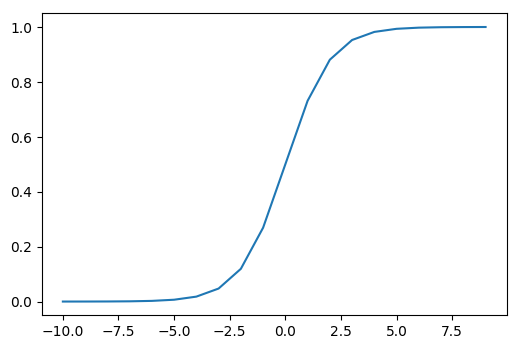

In [21]:
plt.figure(dpi=100)
plt.plot(np.arange(-10, 10), sigmoid(np.arange(-10, 10)))

In [22]:
# Challenge 3
def forward_pass(inp, w, b):
    '''
    Given an input and NN parameters
    calculates the output
    
    Arguments
        inp: np.array() shape 
        (#input_dim, #datapoints)
        w: list of np arrays
        b: list of np arrays
    Returns
        out: np.array() shape
        (#output_dim, #datapoints)
    
    '''
    
    a = inp
    for i in range(len(w)):
        z = np.dot(w[i], a) + b[i]
        a = sigmoid(z)
    out = a
    return out

# 2. Get predictions from an untrained NN

In [23]:
# Implemented
def predict(X, w, b):
    '''
    X.shape is (#datapoints, #input_dim)
    so we need to transpose before doing a forward pass
    and transpose the output as well to get
    y_pred.shape with (#datapoints, #output_dim)
    
    Arguments
        X: np.array() of inputs
           shape (#datapoints, #input_dim)
        w: list of np arrays
        b: list of np arrays
    Returns
        y_pred: np.array() of predictions
                shape (#datapoints, #output_dim)
    
    '''
    X_t = np.transpose(X)
    y_pred_t = forward_pass(X_t, w, b)
    y_pred = np.transpose(y_pred_t)
    return y_pred

In [24]:
y_pred = predict(X, w, b)

In [25]:
X.shape, y_pred.shape

((100, 2), (100, 1))

Text(0, 0.5, 'Output')

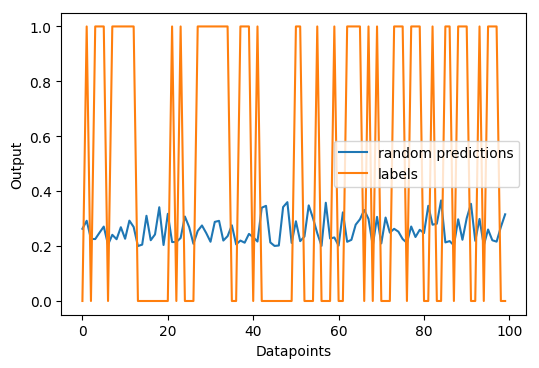

In [26]:
plt.figure(dpi=100)
plt.plot(y_pred, label='random predictions')
plt.plot(y, label='labels')
plt.legend()
plt.xlabel('Datapoints')
plt.ylabel('Output')

In [27]:
# convert to binary
y_pred = 1*(y_pred > 0.5)

In [28]:
# Implemented
def accuracy(y_pred, y):
    '''
    Given 
    -binary predictions
    -labels
    calculates accuracy
    
    '''
    return sum(y_pred == y)/len(y)

In [29]:
# Accuracy of an untrained network
accuracy(y_pred, y)

array([0.5])

# 3. Train a neural network

In [30]:
# Implemented
def cost_function(X, y, w, b):
    '''
    Given
    - input
    - network parameters
    - labels
    
    calculates the mse
    '''
    
    y_pred = predict(X, w, b)
    m = y.shape[0]
    cost = np.sum((y_pred-y)**2)/m  # mse
    return cost

In [31]:
cost_function(X, y, w, b)

0.3170888867339255

In [32]:
# Implemented
def w_update(w, layer_id, i, j, new_param):
    '''
    Given a single weight defined by (layer_id, i, j)
    updates it with a new parameter (new_param)
    
    Arguments
        w: list of np.arrays()
        layer_id: integer
        i: integer
        j: integer
        new_param: float
    Return
        new_w: list of np.arrays()
               where only a single value is changed
    
    '''
    new_w = w.copy()
    layer_w = w[layer_id]
    new_layer_w = layer_w.copy()
    new_layer_w[i, j] = new_param
    new_w[layer_id] = new_layer_w
    return new_w

In [33]:
# Implemented
def b_update(b, layer_id, i, j, new_param):
    '''
    Given a single bias defined by (layer_id, i, j)
    updates it with a new parameter (new_param)
    
    Arguments
        b: list of np.arrays()
        layer_id: integer
        i: integer
        j: integer
        new_param: float
    Return
        new_b: list of np.arrays()
               where only a single value is changed
    
    '''
    new_b = b.copy()
    layer_b = b[layer_id]
    new_layer_b = layer_b.copy()
    new_layer_b[i, j] = new_param
    new_b[layer_id] = new_layer_b
    return new_b

In [34]:
# Challenge 4
def gradient_estimator(X, y, w, b):
    '''
    GD update rule is
    wij = wij - lr * ∂(cost)/∂(wij)
    bij = bij - lr * ∂(cost)/∂(bij)
    
    This function estimates the partial derivates 
    ∂(cost)/∂(wij) and ∂(cost)/∂(bij) using:
    
    ∂(cost)/∂(wij)
    can be estimated by
    [(cost with wij+epsilon) - (cost with wij)]/epsilon
    
    likewise
    
    ∂(cost)/∂(bij)
    can be estimated by
    [(cost with bij+epsilon) - (cost with bij)]/epsilon
    
    For each parameter in w and b, the function will calculate
    ∂(cost)/∂(w) and ∂(cost)/∂(b) and return a list of np.arrays()
    called w_pds and b_pds, respectively.
    
    Arguments
        X: input data
        y: labels
        w: list of np arrays, weights of NN
        b: list of np arrays, biases of NN
    Returns
        w_pds: list of np arrays, same dimensions with w
        b_pds: list of np arrays, same dimensions with b
    
    
    '''
    eps = 1e-4
    cost_val = cost_function(X, y, w, b)
    
    # partial derivatives for weights
    w_pds = []
    for layer_id, layer_w in enumerate(w):
        pd_array = np.zeros(layer_w.shape)
        for i in range(layer_w.shape[0]):
            for j in range(layer_w.shape[1]):

                wij = layer_w[i, j]
                
                wij_plus = wij + eps
                w_plus = w_update(w, layer_id, i, j, wij_plus)
                cost_plus = cost_function(X, y, w_plus, b)

                pd = (cost_plus - cost_val)/eps
                pd_array[i, j] = pd
                
        w_pds.append(pd_array)

    # partial derivatives for biases
    b_pds = []
    for layer_id, layer_b in enumerate(b):
        pd_array = np.zeros(layer_b.shape)
        for i in range(layer_b.shape[0]):
            j = 0
            bij = layer_b[i, j]
            
            bij_plus = bij + eps
            b_plus = b_update(b, layer_id, i, j, bij_plus)
            cost_plus = cost_function(X, y, w, b_plus)
            
            pd = (cost_plus - cost_val)/eps
            pd_array[i, j] = pd
            
        b_pds.append(pd_array)
    
    return w_pds, b_pds

In [35]:
w_pds, b_pds = gradient_estimator(X, y, w, b)

In [36]:
w

[array([[-0.29162544,  0.41583162],
        [-0.19168306, -2.07986545],
        [ 0.22149534, -0.49696164]]),
 array([[-0.16947692,  1.05435843, -0.03559977]])]

In [37]:
w_pds

[array([[-3.04201858e-05,  4.36612850e-04],
        [ 1.69842816e-04, -1.01916134e-03],
        [-5.08745823e-07,  5.16539345e-05]]),
 array([[-0.05341817, -0.01968175, -0.06554047]])]

In [38]:
b

[array([[ 0.38266626],
        [-0.97753102],
        [ 1.12421963]]), array([[-1.2854747]])]

In [39]:
b_pds

[array([[ 0.00358143],
        [-0.01854234],
        [ 0.00059772]]), array([[-0.0879626]])]

In [40]:
# Challenge 5
def one_step_gd(X, y, w, b, lr):
    '''
    This function executes one step of GD and updates w and b
    
    First estimate the gradient using gradient estimator
    Then update params by
    w = w - lr * w_pds
    b = b - lr * b_pds
    
    Arguments
        X: input data
        y: labels
        w: NN weights
        b: NN biases
        lr: learning rate, a float
    Returns
        new_w: updated weights, same size as w
        new_b: updated biases, same size as b
    
    '''
    w_pds, b_pds = gradient_estimator(X, y, w, b)
    
    new_w = []
    for layer_id, layer_w in enumerate(w):
        layer_new_w = layer_w - lr*w_pds[layer_id]
        new_w.append(layer_new_w)

    new_b = []
    for layer_id, layer_b in enumerate(b):
        layer_new_b = layer_b - lr*b_pds[layer_id]
        new_b.append(layer_new_b)
        
    return new_w, new_b

In [41]:
# Cost of random predictions
cost_function(X, y, w, b)

0.3170888867339255

In [42]:
new_w, new_b = one_step_gd(X, y, w, b, lr = 0.01)

In [43]:
# Cost after one step of GD
cost_function(X, y, new_w, new_b)

0.31693260650148025

In [44]:
# Implemented
def GD(X, y, w, b, epoch, lr):
    '''
    Repeats GD one step for a number of epochs
    Saves and plots the error at each epoch
    Arguments
        X: input data
        y: labels
        w: NN weights
        b: NN biases
        epoch: integer
        lr: float
    Return
        w: learned weights
        b: learned biases
    '''
    
    errors = []
    
    for i in range(epoch):
        w, b = one_step_gd(X, y, w, b, lr)
        error = cost_function(X, y, w, b)
        errors.append(error)
    
    plt.figure(dpi=100)
    plt.plot(errors)
    plt.xlabel('# epochs')
    plt.ylabel('loss')
    
    return w, b

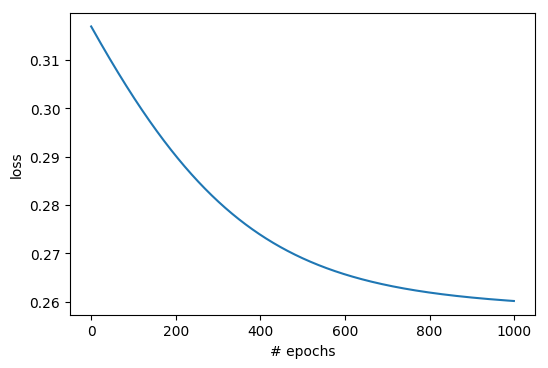

In [45]:
w, b = GD(X, y, w, b, epoch=1000, lr=0.01)

# 4. Putting it together

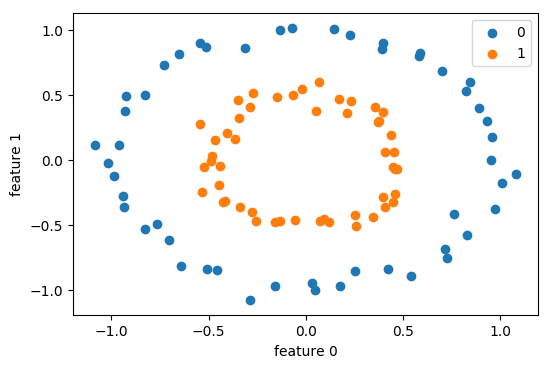

In [46]:
# Generate a dataset
X, y = make_circles(n_samples=100, noise=0.05, factor=0.5)
plt.figure(dpi=100)
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], label=0)
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], label=1)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend()

In [47]:
y = y.reshape(-1, 1)
X.shape, y.shape

((100, 2), (100, 1))

In [48]:
# Initialize the network
w, b = nn_parameter_maker([2, 3, 1])

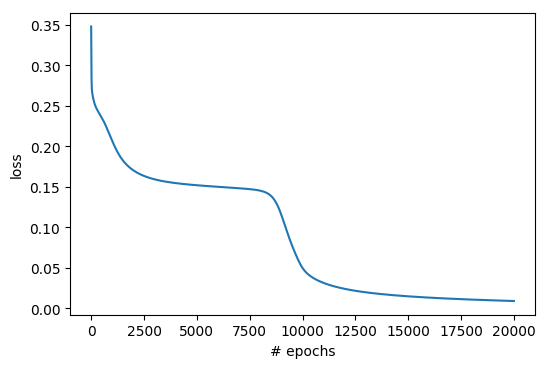

In [49]:
# Train the network
w, b = GD(X, y, w, b, epoch=20000, lr=0.3)

In [50]:
# Get predictions
y_pred = predict(X, w, b)

In [51]:
# Look at the first 10 preds vs. labels
np.concatenate((y_pred[0:10], y[0:10]), axis=1)

array([[0.06038836, 0.        ],
       [0.20904327, 0.        ],
       [0.96496072, 1.        ],
       [0.07828972, 0.        ],
       [0.08306886, 0.        ],
       [0.07092397, 0.        ],
       [0.98145978, 1.        ],
       [0.9440315 , 1.        ],
       [0.98753291, 1.        ],
       [0.08547755, 0.        ]])

Text(0, 0.5, 'Output')

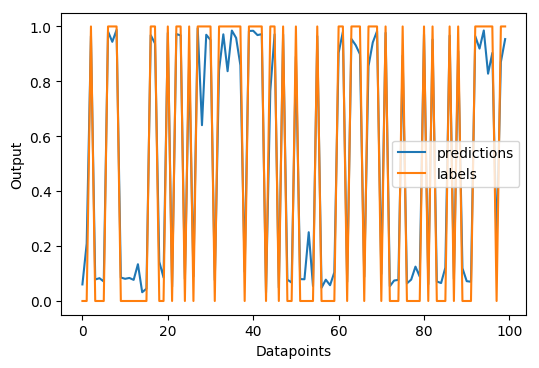

In [52]:
plt.figure(dpi=100)
plt.plot(y_pred, label='predictions')
plt.plot(y, label='labels')
plt.legend()
plt.xlabel('Datapoints')
plt.ylabel('Output')

In [53]:
y_pred = (y_pred > 0.5)*1
accuracy(y_pred, y)

array([1.])

In [54]:
# Check accuracy on test set

# Generate the test set
X_te, y_te = make_circles(n_samples=100, noise=0.05, factor=0.5, random_state=1)
y_te = y_te.reshape(-1, 1)

# Get preds
test_preds = predict(X_te, w, b)

# Calculate acc
test_preds = (test_preds > 0.5)*1
accuracy(test_preds, y_te)

array([1.])